<a href="https://colab.research.google.com/github/Sakvik8445/Design_of_Parallel_Planar_Manipulator/blob/main/OPTEC_Lab1_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of the work is to implement the basic iterative algorithms for unconstrained
minimization presented during the lecture to the function f(x)=∥Ax − b∥^2


***Question 1.*** Compute the gradient and hessian of f

$$ f(x) = (Ax - b)^2 $$
***Gradient Calculation***
$$∇f(x) = ∂/∂x((Ax - b)^2)$$
$$∇f(x) = 2(Ax-b)*A^T$$

***Hessian Calculation***
$$∇^2f(x) = ∂/∂x^2((Ax - b)^2)$$
$$∇^2f(x) = ∂/∂x(2A^2x-2Ab)$$
$$∇^2f(x) = 2A*A^T$$

***Question 2.*** Given $$xk ∈ R^n$$ and a descent direction vector $$dk ∈ R^n$$, find the minimizer
$$t^∗$$ of min g(t) with $$g(t) = f (xk + tdk )$$.

$$g(t) = f(xk + tdk)$$
$$g(t) = (A(xk + tdk)-b)^2$$
$$g(t) = (A(xk + tdk)-b)^T(A(xk + tdk)-b)$$
$$g(t) = (Axk+Atdk-b)^T(Axk+Atdk-b)$$
$$g(t) = (A^Txk^T+A^Ttdk^T-b^T)(Axk+Atdk-b)$$
*Upon Expansion,*
$$g(t) = (dk^TA^TAdk)t^2 + 2(xk^TA^TAdk-b^TAdk)t + (xk^TA^TAxk-2b^T)$$
*From the standard format,*
$$g(t) = αt^2 + βt + γ$$
*We get,*
$$α = dk^TA^TAdk$$
$$β = 2(xk^TA^TAdk-b^TAdk)$$
$$γ = (xk^TA^TAxk-2b^T)$$


***Question 3.***Check the formula for a random **matrix A** and **vector b**, and a random
direction d. To this end, trace g(t) = f (xk + tdk ) and show the theoretical minimizer
computed in ***Question 2.***

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8.0
        x: [-3.333e-01  6.667e-01]
      nit: 3
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 2.778e-01 -2.222e-01]
            [-2.222e-01  2.778e-01]]
     nfev: 15
     njev: 5


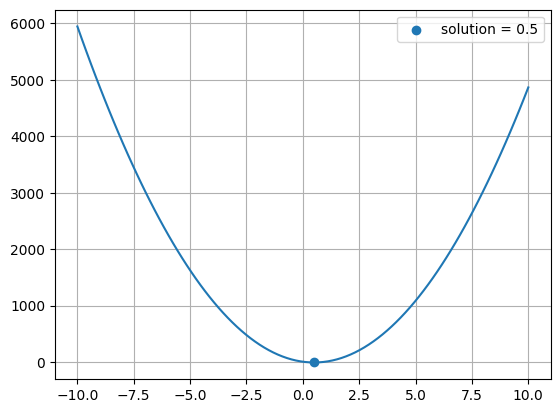

In [10]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as opt


n = 2
A = np.array([[2,1],[1,2]])
xk = np.array([1,1])
xkt = xk.transpose()
dk = np.array([-1,-1])
dkt = dk.transpose()
At = A.transpose()
A = At @ A # generates positive-definite matrix

b =np.array([2,1])
bt = b.transpose()

f = lambda t : np.dot((xk+(t*dk)) - b, A @ (xk+(t*dk)) - b)
sol = opt.minimize(f, np.zeros(n))
print(sol)

alpha = dkt@At@A@dk
beta = 2*(xkt@At@A@dk - bt@A@dk)
gamma = xkt@At@A@xk - 2*(bt@A@xk) + (bt@b)

t= np.linspace(-10,10,100)
g = alpha*(t**2) + beta*(t) + gamma
t_star = -beta/(2*alpha)

fig, ax = plt.subplots()
ax.plot(t, g)
plt.scatter([t_star], [sol.fun], label='solution = '+str(t_star))

plt.legend()
plt.grid()
plt.show()
